In [1]:
import tensorflow as tf
from Model.DCVAE_TF import DCVAE
from Model.Utils import MPS_Generator,plot_images, plot_history

Using TensorFlow backend.


## Load DataSet

In [2]:
def load_data_set(path_tfRecord):
    gen_train = MPS_Generator(path_tfRecord,4)
    gen_train = MPS_Generator(path_tfRecord, gen_train.num)
    x_train = gen_train.get_numpy_batch().astype('float32')
    return x_train
x_train = load_data_set('DataSet/MPS100/train.tfrecords')
x_test =load_data_set('DataSet/MPS100/test_val.tfrecords')

## Build Model

In [3]:
model = DCVAE(input_shape=(100,100,2), latent_cont_dim=500, opt=tf.train.AdamOptimizer(),
              hidden_dim=5000, filters=(32,32,16), strides=(2,2,1), dropout=0.1,lr=0.001)

## Train  Network

In [4]:
model.fit(x_train, x_test, epoch=150, batch_size=128,x=10,steph_epoch=10)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use keras.layers.conv2d_transpose instead.
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use tf.cast instead.
Epoch: 1 - Train cost= 5945.62597656
Epoch: 1 - Test cost= 3454.63403320
Epoch: 2 - Train cost= 2613.69726562
Epoch: 2 - Test cost= 2380.83032227
Epoch: 3 - Train cost= 2083.90234375
Epoch: 3 - Test cost= 1974.86926270
Epoch: 4 - Train cost= 1907.49426270
Epoch: 4 - Test cost= 1924.60009766
Epoch: 5 - Train cost= 1804.89331055
Epoch: 5 - Test cost= 1796.74206543
Epoch: 6 - Train cost= 1731.52954102
Epoch: 6 - Test cost= 1762.62951660
Epoch: 7 - Train cost= 1675.24536133
Epoch: 7 - Test cost= 1728.51977539
Epoch: 8 - Train cost= 1629.58618164
Epoch: 8 - Test cost= 1682.98913574
Epoch: 9 - Train cost= 1588.96923828
Epoch: 

Epoch: 90 - Test cost= 1305.61340332
Epoch: 91 - Train cost= 1142.19055176
Epoch: 91 - Test cost= 1306.09411621
Epoch: 92 - Train cost= 1141.77124023
Epoch: 92 - Test cost= 1305.41748047
Epoch: 93 - Train cost= 1141.70739746
Epoch: 93 - Test cost= 1306.05993652
Epoch: 94 - Train cost= 1141.78442383
Epoch: 94 - Test cost= 1305.78332520
Epoch: 95 - Train cost= 1141.82202148
Epoch: 95 - Test cost= 1305.19494629
Epoch: 96 - Train cost= 1141.93103027
Epoch: 96 - Test cost= 1306.05737305
Epoch: 97 - Train cost= 1141.62451172
Epoch: 97 - Test cost= 1305.06298828
Epoch: 98 - Train cost= 1141.63476562
Epoch: 98 - Test cost= 1304.86816406
Epoch: 99 - Train cost= 1141.41918945
Epoch: 99 - Test cost= 1304.92749023
Epoch: 100 - Train cost= 1141.42248535
Epoch: 100 - Test cost= 1305.58264160
Epoch: 101 - Train cost= 1141.71435547
Epoch: 101 - Test cost= 1305.19897461
Epoch: 102 - Train cost= 1141.66003418
Epoch: 102 - Test cost= 1305.92468262
Epoch: 103 - Train cost= 1141.56359863
Epoch: 103 - Test 

## Train History

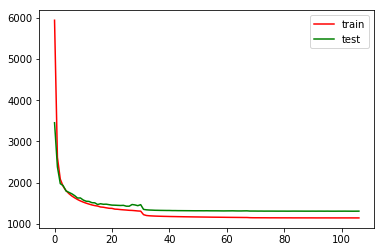

In [5]:
plot_history(model.train_vector,model.test_vector)

## Input images

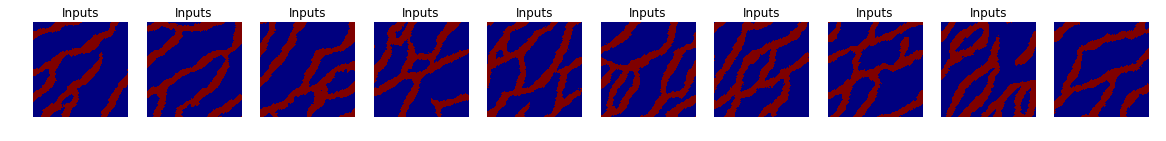

In [6]:
plot_images(model.batch_img, 'Inputs')

## Output images

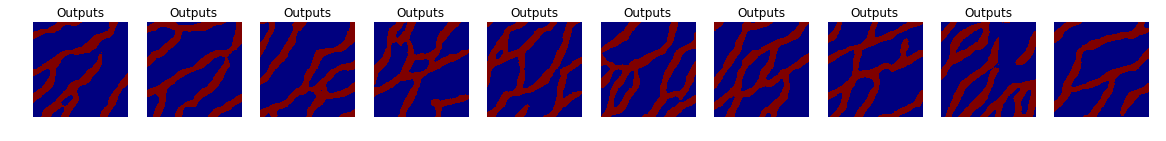

In [7]:
plot_images(model.recon_img, 'Outputs')

## Reconstracted images

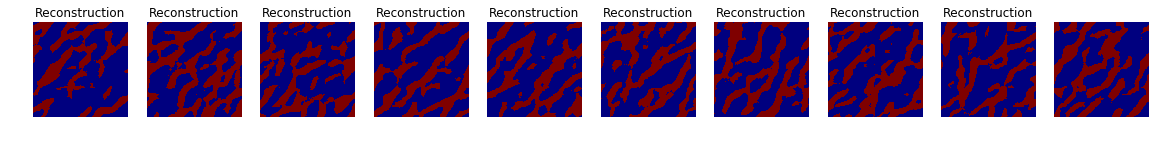

In [8]:
plot_images(model.new_output, 'Reconstruction')